# Universidad de Buenos Aires
# Aprendizaje Profundo - TP2
# Cohorte 18 - 1er bimestre 2025


Este segundo TP comienza desde el día después de la clase 5 (2 de abril) y la ventana de entrega estará abierta hasta las **23hs del miércoles 23 de abril (hora de Argentina)**. La resolución del TP es **individual**. Pueden utilizar los contenidos vistos en clase y otra bibliografía. Si se toman ideas de fuentes externas deben ser correctamente citadas incluyendo el correspondiente link o página de libro.

El formato de entrega debe ser un link a un notebook de google colab (permitir acceso a gerardo.vilcamiza@ieee.org y gvilcamiza.ext@fi.uba.ar) y **se realizará en el siguiente link de google forms: [link](https://forms.gle/XatA691so4eVxZB68)**. Tanto los resultados, como el código y las explicaciones deben quedar guardados y visualizables en el colab.

NO ES NECESARIO QUE NOS ENVIEN COREEO AVISANDO DE LA ENTREGA.

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para este TP2.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-TP2-Co18.ipynb**
- Los códigos deben poder ejecutarse.
- Los resultados, cómo el código, los gráficos y las explicaciones deben quedar guardados y visualizables en el correspondiente notebook.

# **CLASIFICADOR DE EMOCIONES**

El objetivo de este trabajo es construir una red neuronal convolucional (CNN) utilizando Pytorch, capaz de clasificar emociones humanas a partir de imágenes faciales. El clasificador deberá identificar una de las 7 emociones básicas: alegría, tristeza, enojo, miedo, sorpresa, disgusto y seriedad. El dataset se encuentra en este link: https://drive.google.com/file/d/10EWwOriegjawQ3evl1nuIldY3pUR-hQc/view?usp=sharing

## 1. Preprocesamiento de Datos (2 puntos)

Antes de entrenar el modelo, se debe analizar qué tipo de preprocesamiento se debe aplicar a las imágenes. Para esto, se puede considerar uno o más aspectos como:

- Tamaño
- Relación de aspecto
- Color o escala de grises
- Cambio de dimensionalidad
- Normalización
- Balanceo de datos
- Data augmentation
- etc.

Sean criteriosos y elijan las técnicas que consideren pertinentes.

Recomendación: usar `torchvision.transforms` para facilitar el preprocesamiento.



## 2. Construcción y entrenamiento del Modelo CNN (3.5 puntos)

- Construir una red neuronal convolucional desde cero, sin usar modelos pre-entrenados.
- Analizar correctamente qué funciones de activación se deben usar en cada etapa de la red, el learning rate a utilizar, la función de costo y el optimizador.
- Cosas como el número de capas, neuronas, tamaño de kernel, entre otros, queda a criterio de ustedes.

## 3. Evaluación del Modelo (3.5 puntos)

El modelo entrenado debe ser evaluado utilizando las siguientes métricas:

- **Accuracy**:
  - Reportar el valor final en el conjunto de test.
  - Incluir una gráfica de evolución por época para entrenamiento y validación.

- **F1 Score**:
  - Reportar el valor final en el conjunto de test.
  - Incluir una gráfica de evolución por época para entrenamiento y validación.

- **Costo (Loss)**:
  - Mostrar una gráfica de evolución del costo por época para entrenamiento y validación.

- **Classification report**
  - Mostrar la precisión, recall y F1 score por cada clase usando `classification_report`

- **Matriz de confusión**:
  - Mostrar la matriz de confusión absoluta (valores enteros).
  - Mostrar la matriz de confusión normalizada (valores entre 0 y 1 por fila).

Se recomienda utilizar `scikit-learn` para calcular métricas como accuracy, F1 score, el Classification report y las matrices de confusión. Las visualizaciones pueden realizarse con `matplotlib` o `seaborn`, separando claramente los datos de entrenamiento y validación en las gráficas.


 ## 4. Prueba con Imágenes Nuevas (1 punto)
Subir al menos 3 imágenes personales (con el rostro de ustedes o de otras personas), que no formen parte del dataset de entrenamiento ni de testeo.

- Cada imagen debe representar una emoción distinta.

- Aplicar el mismo preprocesamiento que se usó para el dataset.

- Pasar las imágenes por el modelo entrenado y mostrar:

  - La imagen original (preprocesada)

  - La clase inferida por el modelo

- Redactar conclusiones y comentarios finales

# RESOLUCIÓN

### 0. LIBRERÍAS GENERALES

In [1]:
# For data manipulation
import numpy as np

# For visualization
import matplotlib.pyplot as plt

import torch

### 1. PREPROCESAMIENTO DE DATOS

#### 1.1 PRELIMINAR

In [2]:
# import gdown
# import zipfile

# # URL del archivo de Google Drive
# url = 'https://drive.google.com/uc?id=10EWwOriegjawQ3evl1nuIldY3pUR-hQc'
# output = 'dataset.zip'

# # Descargar el archivo zip
# gdown.download(url, output, quiet=False)

# print("Dataset descargado.")

# # Descomprimir el archivo zip directamente en el directorio raíz
# with zipfile.ZipFile(output, 'r') as zip_ref:
#     zip_ref.extractall('.')  # Extraer en el directorio actual

# print("Dataset descomprimido.")

In [3]:
dataset_folderpath = './dataset_emociones/'

#### 1.1 DATA ANALYSIS

Cargamos el dataset de entrenamiento:

In [4]:
from torchvision import datasets

# Cargar el conjunto de entrenamiento
train_dataset = datasets.ImageFolder(root = dataset_folderpath + 'train')


Veamos el tamaño de las imágenes del dataset:

In [5]:
# Inicializar las alturas y anchuras
min_height = float('inf')
max_height = float('-inf')
min_width = float('inf')
max_width = float('-inf')

# Iterar sobre el conjunto de datos para obtener dimensiones
for img, label in train_dataset:
    width, height = img.size  # Obtener dimensiones de la imagen
    min_width = min(min_width, width)
    max_width = max(max_width, width)
    min_height = min(min_height, height)
    max_height = max(max_height, height)

print(f"Ancho mínimo: {min_width}, Ancho máximo: {max_width}")
print(f"Altura mínima: {min_height}, Altura máxima: {max_height}")

Ancho mínimo: 100, Ancho máximo: 100
Altura mínima: 100, Altura máxima: 100


**OBSERVACIONES:**

- Todas las imágenes tienen el mismo ancho y altura.

- La relación de aspecto es 1.

In [6]:
nclasses = len(train_dataset.classes)

print("La cantidad de clases es: ", nclasses)
print("Las clases son: ", train_dataset.classes)
print("Índice a Clase: ", train_dataset.class_to_idx)

La cantidad de clases es:  7
Las clases son:  ['alegria', 'disgusto', 'enojo', 'miedo', 'seriedad', 'sorpresa', 'tristeza']
Índice a Clase:  {'alegria': 0, 'disgusto': 1, 'enojo': 2, 'miedo': 3, 'seriedad': 4, 'sorpresa': 5, 'tristeza': 6}


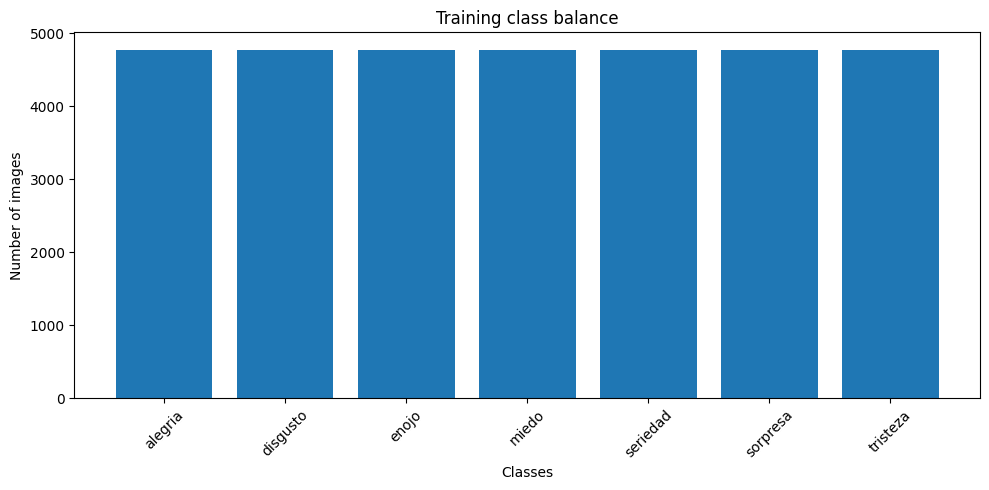

In [7]:
from collections import Counter

# Contar las clases en el conjunto de entrenamiento
class_names = train_dataset.classes
class_counts = Counter(sample[1] for sample in train_dataset.samples)

# Obtener los nombres de las clases y sus recuentos
classes = [class_names[i] for i in range(len(class_names))]
counts = [class_counts[i] for i in range(len(class_names))]

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(classes, counts)
plt.title('Training class balance')
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**OBSERVACIONES:**

- Vemos que hay un desbalance notorio de clases.

- Dada la naturaleza de nuestro problema de clasificación, no tiene sentido que las clases esten desbalanceadas pues no se justifica que haya alguna tendencia a una emoción en particular. Se propone hacer *data augmentation* para balancear las clases para evitar que nuestro modelo sea propenso a clasificar la clases preponderante. Esto permite generalizar nuestro modelo.

Sampleamos algunas imagenes por clase

alegria


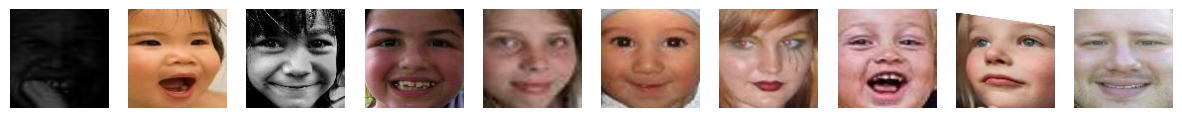

disgusto


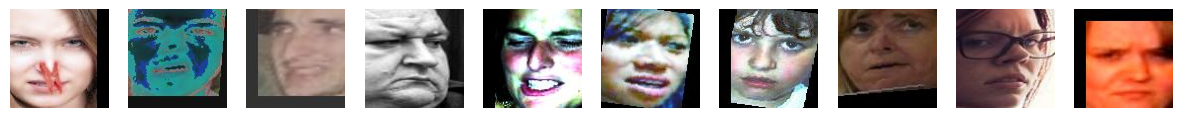

enojo


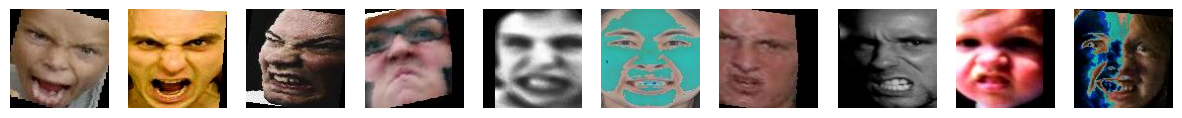

miedo


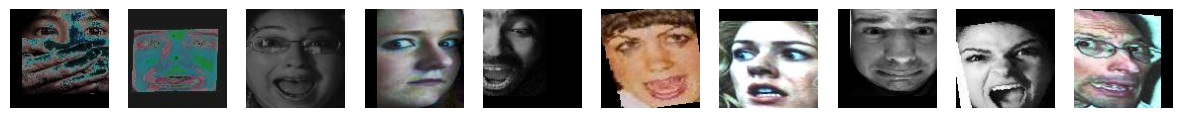

seriedad


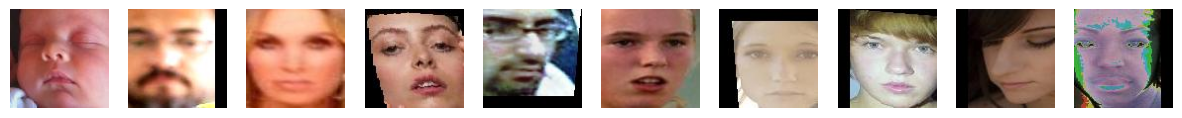

sorpresa


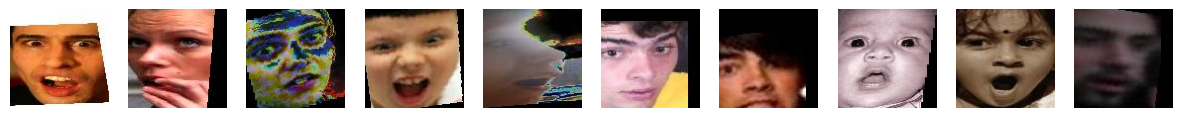

tristeza


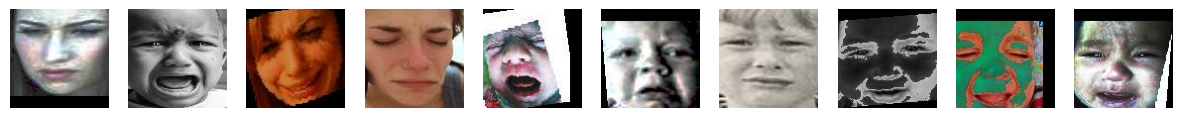

In [8]:
import random
from torchvision.transforms import v2           # usamos v2 porque es más rápido y presenta más capacidades

# Create a dictionary to store the image tensors by folder
img_data = {}
for img_path, label in train_dataset.samples:
    folder_name = train_dataset.classes[label]  # Gets the folder name from the dataset
    if folder_name not in img_data:
        img_data[folder_name] = []
    img_data[folder_name].append(img_path)

# Define the transformation
ToTensor_transform = v2.Compose([                   # Replace v1.ToTensor(): Convert images to tensor between [0,1] 
    v2.ToImage(),                                   
    v2.ToDtype(torch.float32, scale=True),                      
])

# Sample and display images
for i, folder in enumerate(img_data.keys()):
    print(folder)
    sample_size = 10
    # Ensure there are enough images in the folder
    if len(img_data[folder]) < sample_size:
        print(f"Not enough images in folder '{folder}' for sampling.")
        continue

    # Randomly sample image paths and apply transformations
    sampled_images = random.sample(img_data[folder], sample_size)
    
    # Note: This part still uses Image for loading but can be replaced depending on the available format
    tensors = [ToTensor_transform(datasets.folder.default_loader(path)) for path in sampled_images]

    # Create a grid of images
    plt.figure(figsize=(15, 5))
    for index, img_tensor in enumerate(tensors):
        plt.subplot(1, sample_size, index + 1)      # Create a subplot for each image
        plt.imshow(img_tensor.permute(1, 2, 0))     # Change tensor shape from (C, H, W) to (H, W, C)
        plt.axis('off')  # Hide axes

    plt.show()  # Display the images

#### 1.3 DATA AUGMENTATION

Para hacer *data augmentation* para balancear las clases, aprovechamos la funcionalidad *transforms*. En particular, aplicamos la técnica *RandAument*.

Este método necesita que se le especifiquen 2 parámetros: 

- N:    Número transformaciones a aplicar secuencialmente.
- M:    Magnitud de todas las transformaciones. Valor entre [1, 10], donde 10 indica la máxima escala para una transformación dada.

Se pueden aplicar 14 tipos de transformaciones disponibles:

- identity
- rotate 
- posterize
- sharpness
- translate-x
- autoContrast
- solarize 
- contrast 
- shear-x 
- translate-y 
- equalize 
- color 
- brightness
- shear-y

Más precisiones se pueden encontrar en Cubuk et. al. (2019),"RandAugment: Practical automated data augmentation with a reduced search space", 	arXiv:1909.13719, https://doi.org/10.48550/arXiv.1909.13719.

In [9]:
data_augmentation = False

In [10]:
N = 5
M = 8
data_aug_transforms = v2.Compose([
                        v2.RandAugment(num_ops=N, magnitude=M),
                        ToTensor_transform
    ])

In [11]:
import os

train_data = {}

for folder in os.listdir(dataset_folderpath + 'train/'):
    img_path = dataset_folderpath + 'train/' + folder + '/'
    train_data[folder] = [img_path + img for img in os.listdir(img_path)]

max_num_img = max([len(v) for k,v in train_data.items()])
print(f"Número de imagenes en la clase preponderante: {max_num_img}")

Número de imagenes en la clase preponderante: 4772


In [12]:
import shutil

# Nos copiamos la carpeta para no modificar el dataset original:
original_train_folder = dataset_folderpath + 'train/'
augmented_train_folder = dataset_folderpath + 'train_augmented/'

if not os.path.exists(augmented_train_folder):
    shutil.copytree(original_train_folder, augmented_train_folder)
    
aug_data = {}

for folder in os.listdir(augmented_train_folder):
    img_path = augmented_train_folder + folder + '/'
    aug_data[folder] = len(os.listdir(img_path))

In [13]:
from torchvision.utils import save_image
from PIL import Image

for folder, path_list in train_data.items():
    if len(path_list) < max_num_img:
        sets = (max_num_img-len(path_list)) // len(path_list)
        mod = (max_num_img-len(path_list)) % len(path_list)
        for i, path in enumerate(path_list):
            img = Image.open(path)
            img = img.convert('RGB')
            sets_iter = sets + 1 if i < mod else sets
            for k in range(sets_iter):
                save_image(data_aug_transforms(img), f'{augmented_train_folder}{folder}/augmented_{i}_{k}.jpg')

#### 1.4 TRAIN, VALIDATION AND TEST DATASET

In [14]:
import torch
def get_set_normalize_params(dataset):
    # Inicializar listas para almacenar los valores de todos los píxeles
    all_pixels = []

    # Convertir las imágenes a tensores y acumular los valores de los píxeles
    for img, _ in dataset:
        img = ToTensor_transform(img)  # Convertir imagen a tensor
        all_pixels.append(img.reshape(-1))  # Aplana la imagen a un vector 1D

    # Concatenar todos los píxeles en un solo tensor
    all_pixels_tensor = torch.cat(all_pixels)

    # Calcular la media y la desviación estándar
    mean = all_pixels_tensor.mean().item()
    std = all_pixels_tensor.std().item()

    print(f'Media: {mean}')
    print(f'Desviación estándar: {std}')

    return mean, std

# Defino que set uso: si el aumentado o el original
if data_augmentation:
    train_folder = augmented_train_folder
else:
    train_folder = original_train_folder
train_dataset = datasets.ImageFolder(root = train_folder)

# Cargar el conjunto de entrenamiento sin aplicar transform (para calculo de mean y std)
mean, std = get_set_normalize_params(train_dataset)

Media: 0.43042388558387756
Desviación estándar: 0.2856620252132416


In [15]:
from torch.utils.data import DataLoader

in_width = (min_width + max_width) / 2
in_height = (min_height + max_height) / 2

# Definir transformaciones
transform = v2.Compose([
    v2.Resize((in_width, in_height)),                           # Resize images (just in case)
    ToTensor_transform,                                         # Convert to Tensor
    v2.Grayscale(num_output_channels=1),                        # Convert images to grayscale
    v2.Normalize(mean=[mean], std=[std]),                       # Normalize channel
    ])

batch_size = 32

# Cargar el conjunto de entrenamiento pero del set aumentado aplicando transform
train_dataset = datasets.ImageFolder(root = train_folder, transform = transform)
ntrain_0 = len(train_dataset)

# Cargar el conjunto de prueba
test_dataset = datasets.ImageFolder(root = dataset_folderpath + 'test', transform = transform)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
ntest = len(test_dataset)

train_size_0 = ntrain_0 / (ntrain_0 + ntest)
test_size = ntest / (ntrain_0 + ntest)

# Generamos el Validation Set
val_size = 0.20 / train_size_0                    # 20% del set total                 
val_size = int(val_size * ntrain_0)
train_size = ntrain_0 - val_size
train_data, val_data = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Cargamos ambos sets
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)

ntrain = len(train_data)
nval = len(val_data)

train_size = ntrain / (ntrain + nval + ntest)
val_size = nval / (ntrain + nval + ntest)

print("Dimension del set de train:", ntrain)
print("Dimension del set de validation:", nval)
print("Dimension del set de test:", ntest)
print("")
print(f"Fracción de datos de train: {train_size:.2f}")
print(f"Fracción de datos de validation: {val_size:.2f}")
print(f"Fracción de datos de test: {test_size:.2f}")

Dimension del set de train: 26110
Dimension del set de validation: 7294
Dimension del set de test: 3068

Fracción de datos de train: 0.72
Fracción de datos de validation: 0.20
Fracción de datos de test: 0.08


**OBSERVACIONES:**

- Como consecuencia del *data agumentation* del set de train, en relación al total del set nuevo de datos, la fracción de test bajo, no obstante, la cantidad absoluta de casos de test sigue siendo la misma. 

Verificamos que las clases esten balanceadas:

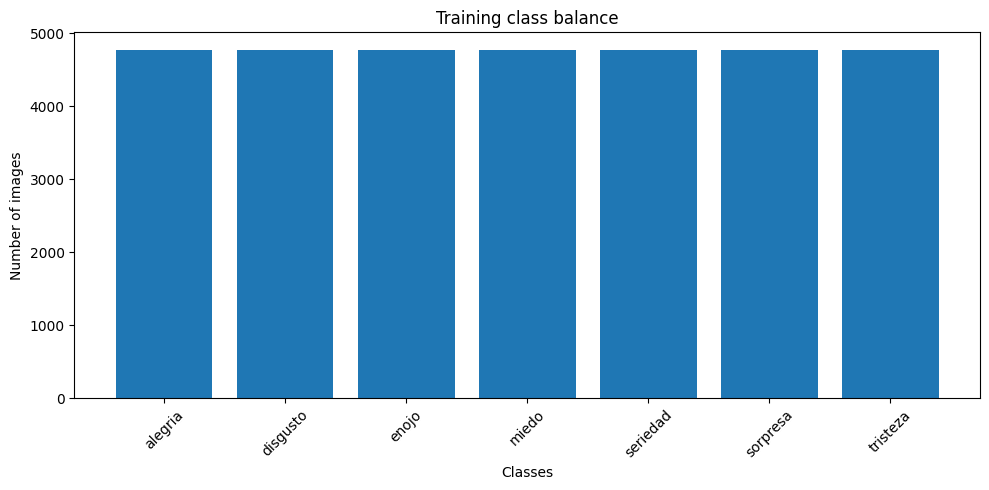

In [16]:
# Contar las clases en el conjunto de entrenamiento
class_names = train_dataset.classes
class_counts = Counter(sample[1] for sample in train_dataset.samples)

# Obtener los nombres de las clases y sus recuentos
classes = [class_names[i] for i in range(len(class_names))]
counts = [class_counts[i] for i in range(len(class_names))]

# Crear el gráfico de barras
plt.figure(figsize=(10, 5))
plt.bar(classes, counts)
plt.title('Training class balance')
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
for images, labels in train_loader:
    print(images.shape)  # Imprime la forma de las imágenes
    print(labels)        # Imprime las etiquetas (números enteros codificados)
    break  # Salir después del primer lote

torch.Size([32, 1, 100, 100])
tensor([2, 5, 1, 2, 2, 2, 5, 6, 6, 1, 5, 4, 6, 4, 1, 0, 2, 0, 1, 0, 5, 4, 2, 6,
        5, 1, 2, 4, 6, 6, 2, 1])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


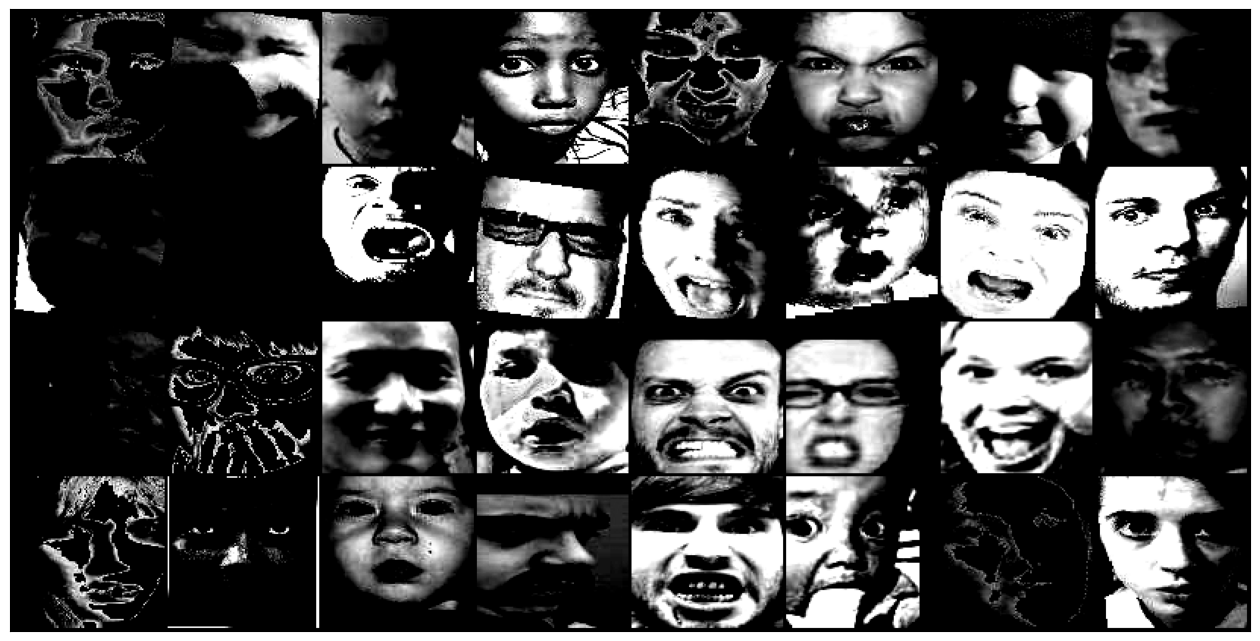

In [18]:
from torchvision.utils import make_grid

def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,12))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=8).permute(1,2,0))
        break
        
show_batch(train_loader)

**OBSERVACIONES:**

- Como consecuencia de la normalización, los valores estan centrados alrededor de 0, es decir, que habra valores negativos. Esto resulta útil para ayudar al modelo a "aprender" de manera más efectiva, sin embargo, a la hora de visualizar, vemos que a los valores por debajo de 0 se les asigna el valor 0 (negro).

### 2. CNN MODEL

Primeramente, configuramos el *device* acorde a los disponible:

In [19]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

#### 2.1 Model definition

Definimos una clase base con funcionalidades orientadas a entrenar el modelo, validarlo y obtener los resultados por epoch.

In [20]:
import torch.nn as nn
from torch import stack
import torch.nn.functional as F

from sklearn.metrics import accuracy_score, f1_score

class ImageClassificationBase(nn.Module):
    
    def training_step(self, batch):
        images, labels = batch
        images, labels =  images.to(device), labels.to(device)  # Send to device
        out = self(images)                                      # Generate predictions
        loss = F.cross_entropy(out, labels)         # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch
        images, labels =  images.to(device), labels.to(device)  # Send to device 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        
        _, preds = torch.max(out, dim=1)
        
        pred_ndarray = preds.cpu().numpy()
        labels_ndarray = labels.cpu().numpy()
        
        acc = torch.tensor(accuracy_score(labels_ndarray, pred_ndarray))                    # Calculate accuracy
        f1 = torch.tensor(f1_score(labels_ndarray, pred_ndarray, average='weighted'))       # Calculate f1-score
        
        return {'val_loss': loss.detach(), 'val_acc': acc, 'val_f1': f1}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]     # Recover batch losses
        epoch_loss = stack(batch_losses).mean()             # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]        # Recover batch accuracies
        epoch_acc = stack(batch_accs).mean()                # Combine accuracies
        batch_f1 = [x['val_f1'] for x in outputs]           # Recover batch f1-score
        epoch_f1 = stack(batch_f1).mean()                   # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item(), 'val_acc': epoch_f1.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

Defino ahora mi CNN tomando como base la clase "ImageClassificationBase" definida previamente.

In [21]:
# Bloque de convolución para emplear en mi red
def conv_block(c_in, c_out, activation = nn.ReLU(), k=3, p='same', s=1, pk=2):
    return nn.Sequential(                                   # el módulo Sequential se engarga de hacer el forward de todo lo que tiene dentro.
        nn.Conv2d(c_in, c_out, k, padding=p, stride=s),     # conv
        activation,                                         # activation
        nn.MaxPool2d(pk)                                    # pooling
    )

# Función auxiliar para calcular la dimensión de salida de la red convolucional
def calculate_output_dimensions(input_height, 
                                input_width, 
                                n_conv_layers, 
                                kernel_size, 
                                padding_type, 
                                stride, 
                                pooling_kernel_size):
    heights = []
    widths = []

    if padding_type == 'valid':
        padding = 0
    elif padding_type == 'same':
        padding = kernel_size // 2
    elif padding_type == 'full':
        padding = kernel_size - 1

    current_height = input_height
    current_width = input_width

    for _ in range(n_conv_layers):
        # Calcula la salida de la capa convolucional
        current_height = (current_height + 2 * padding - kernel_size) // stride + 1
        current_width = (current_width + 2 * padding - kernel_size) // stride + 1

        # Aplica el max pooling
        current_height = (current_height - pooling_kernel_size) // pooling_kernel_size + 1
        current_width = (current_width - pooling_kernel_size) // pooling_kernel_size + 1

        # Guarda la altura y el ancho después de cada capa
        heights.append(current_height)      # Guarda la altura
        widths.append(current_width)        # Guarda el ancho

    return heights, widths

In [22]:
class CNN_EmotionClassifier(ImageClassificationBase):
    def __init__(self, 
                 inputs_by_conv_layer = [1, 32],    # Convolutional layers
                 inputs_by_hidden_layer = [],       # Fully connected HIDDEN layers
                 n_outputs = nclasses,
                 kernel = 3,
                 padding = 'same',
                 stride = 1,
                 poolingk = 2,
                 in_height = None,
                 in_width = None,
                 info = True):
        
        super().__init__()

        # -----------------------------------------------------
        # ACTIVATION FUNCTION
        # -----------------------------------------------------

        self.activation = nn.ReLU()

        # -----------------------------------------------------
        # CONVOLUTIONAL LAYERS
        # -----------------------------------------------------

        self.kernel = kernel
        self.padding = padding
        self.stride = stride
        self.poolingk = poolingk

        self.conv = nn.ModuleList()
        self.n_conv_layers = len(inputs_by_conv_layer) - 1

        for i in range(self.n_conv_layers):
            self.conv.append(conv_block(inputs_by_conv_layer[i], 
                                        inputs_by_conv_layer[i+1], 
                                        activation = self.activation, 
                                        k=self.kernel, 
                                        p=self.padding, 
                                        s=self.stride,
                                        pk=self.poolingk))
            
        conv_heights, conv_width = calculate_output_dimensions(in_height, 
                                                                in_width,
                                                                self.n_conv_layers, 
                                                                self.kernel, 
                                                                self.padding, 
                                                                self.stride, 
                                                                self.poolingk)  

        # -----------------------------------------------------
        # FULLY CONNECTED HIDDEN LAYERS
        # -----------------------------------------------------

        self.lin = nn.ModuleList()

        conv_out_height = conv_heights[-1]  # Altura de salida de la última capa convolucional
        conv_out_width = conv_width[-1]     # Ancho de salida de la última capa convolucional
        inputs_by_lin_layer = [int(inputs_by_conv_layer[-1]*conv_out_height*conv_out_width)]
        inputs_by_lin_layer.extend(inputs_by_hidden_layer)

        self.n_lin_layers = len(inputs_by_lin_layer) - 1
        for i in range(self.n_lin_layers):
            self.lin.append(nn.Linear(in_features=inputs_by_lin_layer[i], out_features=inputs_by_lin_layer[i + 1]))
        
        # -----------------------------------------------------
        # OUTPUT LAYERS
        # -----------------------------------------------------

        self.output = nn.Linear(in_features=inputs_by_lin_layer[-1], out_features=n_outputs)  # Output size igual a n_classes

        if info:
            print('Neural Network successfully built')
            print('Architecture:')
            print(' ')        
            print(self)
            print(' ')        
            print('Número total de capas de Convolucionales: ', self.n_conv_layers)
            print('Número total de capas de Fully Connected: ', self.n_lin_layers+1)
            print('Número total de capas : ', self.n_conv_layers + self.n_lin_layers + 1)       

        # Me fijo en el número de parámetros entrenables
        pytorch_total_params = sum(p.numel() for p in self.parameters() if p.requires_grad)
        print('Número total de parámetros a entrenar: ', pytorch_total_params)

    def forward(self, x):
        # Forward step
        # CONVOLUTIONAL LAYERS
        for i in range(self.n_conv_layers):
            x = self.conv[i](x)
        x = x.flatten(start_dim=1)
        # HIDDEN LAYERS
        for i in range(self.n_lin_layers):
            x = self.lin[i](x)
        # OUTPUT LAYER
        x = self.output(x)  # No aplicar softmax aquí, se aplica en la pérdida
        return x  # Return Logits

In [23]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)


def fit(model, dataloader_train, dataloader_val, epochs = 30, patience = 10, learning_rate = 1e-4, opt_func = torch.optim.SGD):
    try:
        device
    except NameError:
        device = 'cpu'
    
    # Send model to device
    model.to(device)
    
    # Early Stopping parameters
    best_val_loss = float('inf')
    patience_counter = 0
    if patience is None:
        patience = epochs
    
    history = []
    optimizer = opt_func(model.parameters(), learning_rate)
    
    for epoch in range(epochs):
        model.train()
        train_losses = []
        
        for batch in dataloader_train:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        result = evaluate(model, dataloader_val)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    
        # Early Stopping
        if result['val_loss'] < best_val_loss:
            best_val_loss = result['val_loss']      # Update best loss
            patience_counter = 0                    # Reset patience counter
        else:
            patience_counter += 1  # Update patience counter

        if patience_counter >= patience:
            print(f"Early stopping triggered after {epoch + 1} epochs.")
            break
    
    return history

In [24]:
from sklearn import metrics

from torch import argmax

def fit2(model, dataloader_train, dataloader_val, epochs = 30, patience = 10, learning_rate = 1e-4, opt_func = torch.optim.SGD):

    # Mini-batch Algorithm

    try:
        device
    except NameError:
        device = 'cpu'
    
    # Send model to device
    model.to(device)
    
    # definimo optimizer y la función de pérdida
    optimizer = opt_func(model.parameters(), lr = learning_rate)
    loss_function = torch.nn.CrossEntropyLoss()
    
    # List initialization
    train_loss_by_epoch = []
    val_loss_by_epoch = []

    train_acc_by_epoch = []
    val_acc_by_epoch = []

    # Early Stopping parameters
    best_val_loss = float('inf')
    patience_counter = 0
    if patience is None:
        patience = epochs
        
    # Mini-Batch loop
    for epoch in range(epochs):

        ############################################
        ## TRAINING
        ############################################
        model.train(True)   # Activar modo train

        epoch_loss = 0
        epoch_y_hat = []
        epoch_y = []

        for i, data in enumerate(dataloader_train):
            # Get mini-batch training data
            x_batch, y_batch = data
            x_batch, y_batch = x_batch.to(device), y_batch.to(device) # Send to device
            
            # Forward step
            optimizer.zero_grad()
            y_batch_hat = model(x_batch)

            # Loss calculation
            loss = loss_function(y_batch_hat, y_batch)

            # Backpropagation step
            loss.backward()
            optimizer.step()

            # Save both true and prediction values for metrics calculations
            epoch_y += list(y_batch.detach().cpu().numpy())
            epoch_y_hat += list(argmax(y_batch_hat, dim=1).detach().cpu().numpy())

            # Cumulative batch loss
            epoch_loss += loss.item()

        # Batch loss mean
        epoch_loss = epoch_loss / len(dataloader_train.dataset)

        # Save epoch loss for plotting
        train_loss_by_epoch.append(epoch_loss)

        # Compute epoch metric mean
        accuracy = metrics.accuracy_score(epoch_y, epoch_y_hat)

        # Save epoch accuracy for plotting
        train_acc_by_epoch.append(accuracy)

        ############################################
        ## Validation
        ############################################
        model.eval()  # Set to validation mode

        val_epoch_loss = 0
        val_epoch_y_hat = []
        val_epoch_y = []

        for i, data in enumerate(dataloader_val):
            # Get mini-batch validation data
            x_batch, y_batch = data
            # x_batch, y_batch = x_batch.to(device), y_batch.to(device) # Send to device
            
            # Forward step
            y_batch_hat = model(x_batch)

            # Loss calculation
            loss = loss_function(y_batch_hat, y_batch)

            # Save both true and prediction values for metrics calculations
            val_epoch_y += list(y_batch.detach().cpu().numpy())
            val_epoch_y_hat += list(argmax(y_batch_hat, dim=1).detach().cpu().numpy())

            # Cumulative batch loss
            val_epoch_loss += loss.item()

        # Batch loss mean
        val_epoch_loss = val_epoch_loss / len(dataloader_val.dataset)

        # Save epoch loss for plotting
        val_loss_by_epoch.append(val_epoch_loss)

        # Compute epoch metric
        val_accuracy = metrics.accuracy_score(val_epoch_y, val_epoch_y_hat)

        # Save epoch accuracy for plotting
        val_acc_by_epoch.append(val_accuracy)

        ############################################
        ## Print results by epoch
        ############################################
        print(f"Epoch {epoch+1} | " \
            f"Train/Valid loss: {epoch_loss:.3f} / {val_epoch_loss:.3f} | " \
            f"Train/Valid accuracy: {accuracy:.3f} / {val_accuracy:.3f}")

        # Early Stopping
        if val_epoch_loss < best_val_loss:
            best_val_loss = val_epoch_loss          # Update best loss
            patience_counter = 0                    # Reset patience counter
        else:
            patience_counter += 1  # Update patience counter

        if patience_counter >= patience:
            print(f"Early stopping triggered after {epoch + 1} epochs.")
            break

#### 2.1 Hyperparameter tunning

A los efectos de reducir los tiempos de calculos durante la optimización de hiperparámetros, podríamos plantear 3 opciones:

1) Trabajar con un sub-conjunto de los datos de entrenamiento.
2) Calcular un número reducido de epochs (o incluso solamente 1)
3) Una combinación de las 2 anteriores.

En este caso, optaremos por la opción 3) con un sampleo del 30% del set de training y validation y 5 epochs.

In [25]:
def get_sample_loaders(train_dataset, val_dataset, train_sample_size, val_sample_size, batch_size):
    # Randomly sample indices from the training dataset
    train_indices = torch.randperm(len(train_dataset))[:train_sample_size].tolist()
    # Randomly sample indices from the validation dataset
    val_indices = torch.randperm(len(val_dataset))[:val_sample_size].tolist()
    
    # Create Samplers for train and validation
    train_sampler = torch.utils.data.SubsetRandomSampler(train_indices)
    val_sampler = torch.utils.data.SubsetRandomSampler(val_indices)

    # Create DataLoader with the sampled data
    train_loader_sample = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler)
    val_loader_sample = DataLoader(val_dataset, batch_size=batch_size, sampler=val_sampler)

    return train_loader_sample, val_loader_sample

In [26]:
# Sample sizes for loaders (adjust this as needed)
sample_fraction = 0.30
train_sample_size = int(ntrain * sample_fraction)   # Number of samples for training
val_sample_size = int(nval * sample_fraction)     # Number of samples for validation

# Get sample loaders for the objective function
train_loader_sample, val_loader_sample = get_sample_loaders(train_loader.dataset, val_loader.dataset, train_sample_size, val_sample_size, batch_size)

In [27]:
import optuna

def objective(trial):
    lr = trial.suggest_float('lr', 1e-5, 1e-2)                          # Learning rate
    n_conv_layers = trial.suggest_int('n_conv_layers', 3, 6)            # Número de capas convolucionales
    n_hidden_layers = trial.suggest_int('n_hidden_layers', 0, 4)        # Número de capas fully connected
    
    kernel = trial.suggest_int('kernel', 3, 7, step=2)
    
    last_cout = 4
    inputs_by_conv_layer = [1, last_cout]
    for i in range(n_conv_layers-1):
        inputs_by_conv_layer.append(last_cout * 2)
        last_cout *= 2
    
    # FCNN Hidden parameters
    last_hout = 64
    inputs_by_hidden_layer = [last_hout]
    for i in range(n_hidden_layers-1):
        inputs_by_hidden_layer.append(last_hout * 2)
        last_hout *= 2
        
    # Instanciamos la red
    cnn_model = CNN_EmotionClassifier(inputs_by_conv_layer,
                    inputs_by_hidden_layer,
                    n_outputs = nclasses,
                    kernel = kernel,
                    in_height = in_height,
                    in_width = in_width,
                    info=False)
    
    # Run training loop and return final loss
    num_epochs = 5
    patience = None
    opt_func = torch.optim.Adam
    #fitting the model on training data and record the result after each epoch
    history = fit(cnn_model, train_loader_sample, val_loader_sample, num_epochs, patience, lr, opt_func)  

    return history[-1]['val_loss']

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)
print("Best hyperparameters:", study.best_params)

c:\Users\badesia\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-04-26 13:16:47,569] A new study created in memory with name: no-name-1c2c02a6-8642-4b98-a33f-711afc480c32


Número total de parámetros a entrenar:  179751
Epoch [0], train_loss: 1.9502, val_loss: 1.9463, val_acc: 0.0409
Epoch [1], train_loss: 1.9471, val_loss: 1.9478, val_acc: 0.0368


[W 2025-04-26 13:17:09,430] Trial 0 failed with parameters: {'lr': 0.0023866984191872618, 'n_conv_layers': 5, 'n_hidden_layers': 2, 'kernel': 7} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\badesia\AppData\Local\Programs\Python\Python311\Lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\badesia\AppData\Local\Temp\ipykernel_8368\1842748649.py", line 37, in objective
    history = fit(cnn_model, train_loader_sample, val_loader_sample, num_epochs, patience, lr, opt_func)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\badesia\AppData\Local\Temp\ipykernel_8368\3448430907.py", line 30, in fit
    for batch in dataloader_train:
  File "c:\Users\badesia\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\utils\data\dataloader.py", line 708, in __ne

KeyboardInterrupt: 

#### 2.3 Best CNN Model

In [ ]:
# Recover best parameters
lr = study.best_params['lr']
n_conv_layers = study.best_params['n_conv_layers']
n_hidden_layers = study.best_params['n_hidden_layers']
kernel = study.best_params['kernel']

print(f'Learning Rate: {lr}')
print(f'Number of Convolutional Layers: {n_conv_layers}')
print(f'Number of Hidden Layers: {n_hidden_layers}')
print(f'Kernel Size: {kernel}')

# CNN parameters
n_channels = 1
last_cout = 4
inputs_by_conv_layer = [n_channels, last_cout]
for i in range(n_conv_layers-1):
    inputs_by_conv_layer.append(last_cout * 2)
    last_cout *= 2

# FCNN Hidden parameters
last_hout = 64
inputs_by_hidden_layer = [last_hout]
for i in range(n_hidden_layers-1):
    inputs_by_hidden_layer.append(last_hout * 2)
    last_hout *= 2

# Instanciamos la red
best_cnn_model = CNN_EmotionClassifier(inputs_by_conv_layer,
                    inputs_by_hidden_layer,
                    n_outputs = nclasses,
                    kernel = kernel,
                    in_height = in_height,
                    in_width = in_width,
                    )

Learning Rate: 0.0019415315893473468
Number of Convolutional Layers: 3
Number of Hidden Layers: 4
Kernel Size: 5
Neural Network successfully built
Architecture:
 
CNN_EmotionClassifier(
  (activation): ReLU()
  (conv): ModuleList(
    (0): Sequential(
      (0): Conv2d(1, 4, kernel_size=(5, 5), stride=(1, 1), padding=same)
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (1): Sequential(
      (0): Conv2d(4, 8, kernel_size=(5, 5), stride=(1, 1), padding=same)
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (0): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1), padding=same)
      (1): ReLU()
      (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
  )
  (lin): ModuleList(
    (0): Linear(in_features=2304, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=128, bias=True)
    (2):

In [ ]:
import torchinfo as torchinfo

torchinfo.summary(best_cnn_model)

Layer (type:depth-idx)                   Param #
CNN_EmotionClassifier                    --
├─ReLU: 1-1                              --
├─ModuleList: 1-2                        --
│    └─Sequential: 2-1                   --
│    │    └─Conv2d: 3-1                  104
│    │    └─ReLU: 3-2                    --
│    │    └─MaxPool2d: 3-3               --
│    └─Sequential: 2-2                   --
│    │    └─Conv2d: 3-4                  808
│    │    └─ReLU: 3-5                    --
│    │    └─MaxPool2d: 3-6               --
│    └─Sequential: 2-3                   --
│    │    └─Conv2d: 3-7                  3,216
│    │    └─ReLU: 3-8                    --
│    │    └─MaxPool2d: 3-9               --
├─ModuleList: 1-3                        --
│    └─Linear: 2-4                       147,520
│    └─Linear: 2-5                       8,320
│    └─Linear: 2-6                       33,024
│    └─Linear: 2-7                       131,584
├─Linear: 1-4                            3,591
To

#### 2.3 Training

In [ ]:

num_epochs = 30
patience = 10
opt_func = torch.optim.Adam
#fitting the model on training data and record the result after each epoch
history = fit(best_cnn_model, train_loader_sample, val_loader_sample, num_epochs, patience, lr, opt_func)  

Epoch [0], train_loss: 1.6243, val_loss: 1.4641, val_acc: 0.4304
Epoch [1], train_loss: 1.4127, val_loss: 1.4148, val_acc: 0.4538
Epoch [2], train_loss: 1.3152, val_loss: 1.3389, val_acc: 0.4775
Epoch [3], train_loss: 1.2456, val_loss: 1.2644, val_acc: 0.5184
Epoch [4], train_loss: 1.1943, val_loss: 1.2958, val_acc: 0.5026
Epoch [5], train_loss: 1.1595, val_loss: 1.2553, val_acc: 0.5299
Epoch [6], train_loss: 1.1219, val_loss: 1.3024, val_acc: 0.5169
Epoch [7], train_loss: 1.0959, val_loss: 1.2563, val_acc: 0.5215
Epoch [8], train_loss: 1.0709, val_loss: 1.2561, val_acc: 0.5329
Epoch [9], train_loss: 1.0442, val_loss: 1.2577, val_acc: 0.5435
Epoch [10], train_loss: 1.0250, val_loss: 1.2424, val_acc: 0.5362
Epoch [11], train_loss: 1.0070, val_loss: 1.2523, val_acc: 0.5426
Epoch [12], train_loss: 0.9811, val_loss: 1.2696, val_acc: 0.5348
Epoch [13], train_loss: 0.9736, val_loss: 1.2726, val_acc: 0.5339
Epoch [14], train_loss: 0.9528, val_loss: 1.2697, val_acc: 0.5390
Epoch [15], train_lo

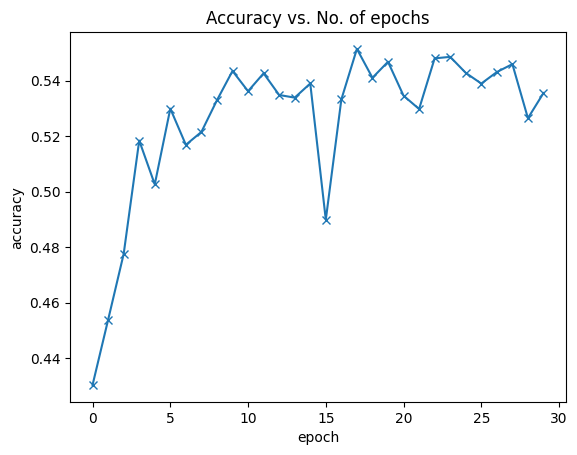

In [ ]:
def plot_accuracies(history):
    """ Plot the history of accuracies"""
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');
    

plot_accuracies(history)


In [ ]:
def plot_f1score(history):
    """ Plot the history of accuracies"""
    accuracies = [x['val_f1'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('f1-score')
    plt.title('f1-score vs. No. of epochs');
    

plot_f1score(history)

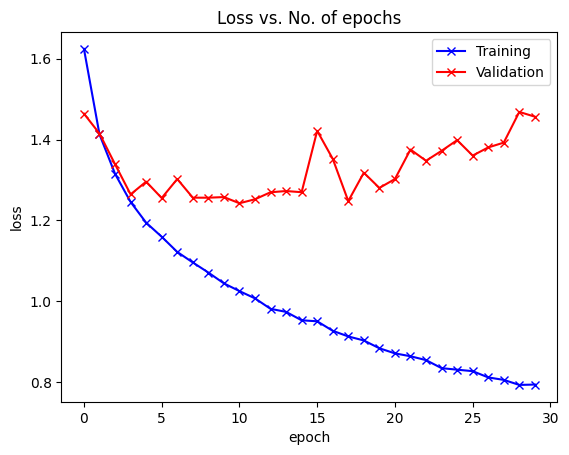

In [ ]:
def plot_losses(history):
    """ Plot the losses in each epoch"""
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history)

### 3. MÉTRICAS DE PERFORMANCE

#### 3.1 Predicciones sobre el Test set

In [ ]:
from torch import from_numpy
from torch import no_grad

best_cnn_model.eval()  # Modo de evaluación
with no_grad():
    outputs = best_cnn_model(X_test_transformed_tensor)
    y_pred_cnn = argmax(outputs, dim=1).cpu().numpy()                                    # Neural network with embeddings

#### 7.2 Confusión

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Veamos la matriz de confusión para cada modelo
cm_cnn = confusion_matrix(y_test, y_pred_nn, labels=classes_values)                         # Neural network without embeddings

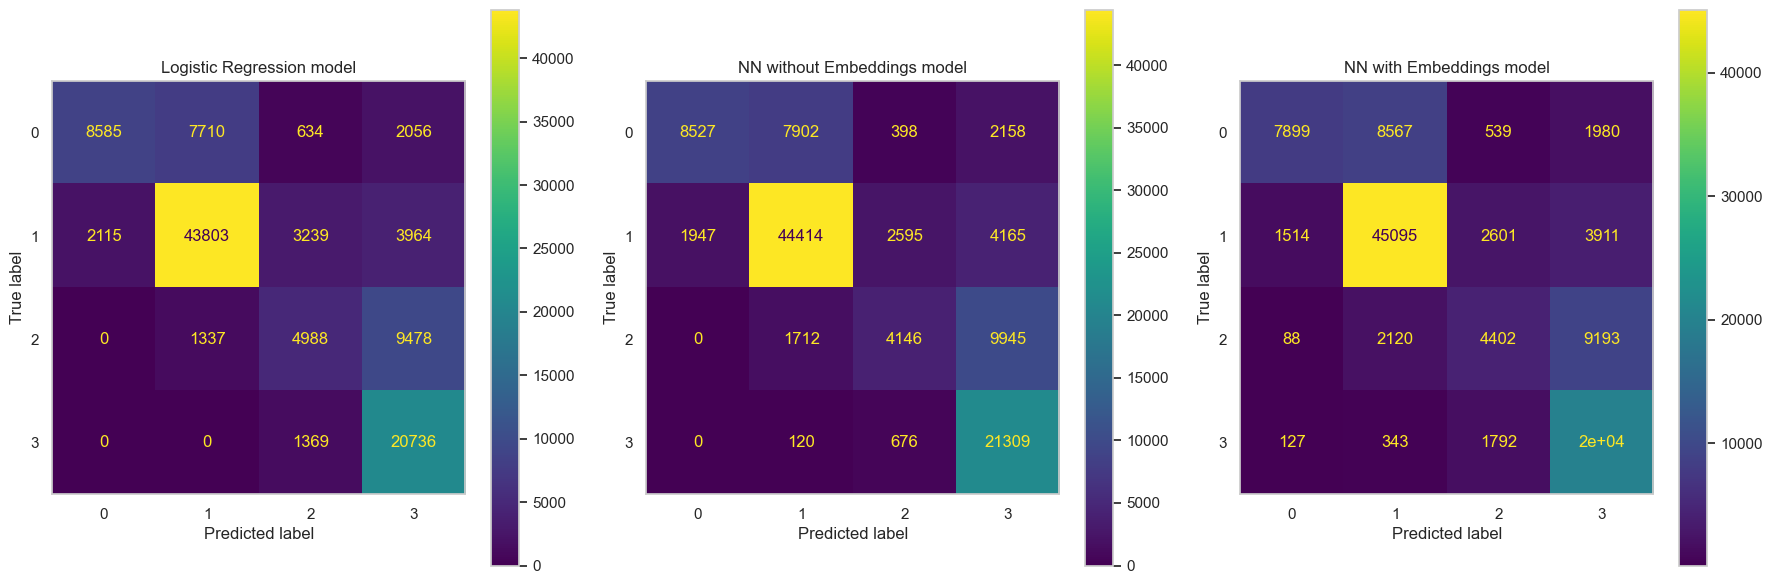

In [ ]:
# Crear una figura con subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))


# # ----------------------------------------------------------------
# # Neural Network without Embeddings
# # ----------------------------------------------------------------

disp = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=classes_values)
disp.plot(ax=axs[1])
axs[1].set_title("NN without Embeddings model")
axs[1].grid(False)

plt.tight_layout()
plt.show()

### Observaciones

- En términos generales, los 3 modelos tienen una performance similar, siendo el costo computacional de la Regresión Logistica es sumamente inferior al de ambas redes neuronales.

#### 7.3 Evaluación de métricas

In [ ]:
# Veamos algunas métricas
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
raw_data = []

# ----------------------------------------------------------------
# Logistic Regression
# ----------------------------------------------------------------

print("Logistic Regression model")
print("\n")
accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log, average='weighted')
recall = recall_score(y_test, y_pred_log, average='weighted')
f1 = f1_score(y_test, y_pred_log, average='weighted')

print(f"La exactitud de clasificación es: {accuracy}")
print(f"F1-score de testeo fue: {f1}")
print(f"Precisión de testeo fue: {precision}")
print(f"Recall de testeo fue: {recall}")
print("\n")

# ----------------------------------------------------------------
# Neural Network without Embeddings
# ----------------------------------------------------------------

print("Neural Network without Embeddings model")
print("\n")
accuracy = accuracy_score(y_test, y_pred_nn)
precision = precision_score(y_test, y_pred_nn, average='weighted')
recall = recall_score(y_test, y_pred_nn, average='weighted')
f1 = f1_score(y_test, y_pred_nn, average='weighted')

print(f"La exactitud de clasificación es: {accuracy}")
print(f"F1-score de testeo fue: {f1}")
print(f"Precisión de testeo fue: {precision}")
print(f"Recall de testeo fue: {recall}")
print("\n")

# ----------------------------------------------------------------
# Neural Network with Embeddings
# ----------------------------------------------------------------

print("Neural Network with Embeddings model")
print("\n")
accuracy = accuracy_score(y_test, y_pred_nnwe)
precision = precision_score(y_test, y_pred_nnwe, average='weighted')
recall = recall_score(y_test, y_pred_nnwe, average='weighted')
f1 = f1_score(y_test, y_pred_nnwe, average='weighted')

print(f"La exactitud de clasificación es: {accuracy}")
print(f"F1-score de testeo fue: {f1}")
print(f"Precisión de testeo fue: {precision}")
print(f"Recall de testeo fue: {recall}")
print("\n")

Logistic Regression model


La exactitud de clasificación es: 0.7100187248895595
F1-score de testeo fue: 0.696873687974807
Precisión de testeo fue: 0.7236854811327659
Recall de testeo fue: 0.7100187248895595


Neural Network without Embeddings model


La exactitud de clasificación es: 0.7126002145181523
F1-score de testeo fue: 0.693660811670909
Precisión de testeo fue: 0.7266939299354168
Recall de testeo fue: 0.7126002145181523


Neural Network with Embeddings model


La exactitud de clasificación es: 0.7020833712073009
F1-score de testeo fue: 0.6840388385998827
Precisión de testeo fue: 0.7114397638383085
Recall de testeo fue: 0.7020833712073009


